# Exercise

Peru står for 13% af den samlede avocado produktion, og de har hyret dig til at redegøre for prisudbviklingen i to af deres større afsætnings områder på den amerikanske øst-kyst, nemlig Boston og Albany.  

![](https://cdn.winsightmedia.com/platform/files/public/gb/June-2012/Peruvian-Avocados-Return-to-the-United-States/PAC-Billboard.jpg)

Anvend argumenter i plotly så prisen-udviklingen over tid har de faktorer, som redegør for pris-udsving for samme dato.   

- Plot prisen på avocadoer over tid for de to stater
- overvej håndtering af avocado typen i.e. "conventional" and "organic"
- argumenterne `style` og `hue` kan bruges


In [2]:
import pandas as pd
import plotly.express as px
import numpy as np

avocados = pd.read_csv("force_tech/data/avocado.csv")\
    .drop("X1",axis=1)\
    .query("region < 'B'")
avocados['Date'] = pd.to_datetime(avocados.Date)
avocados.head()

,Date,AveragePrice,total_volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
avocados["size"] = np.log(avocados["total_volume"]) 
fig = px.scatter(
    avocados,
    x="Date",
    y="AveragePrice",
    color="region",
    symbol="type",
    template="none",
    size="total_volume"
)
fig

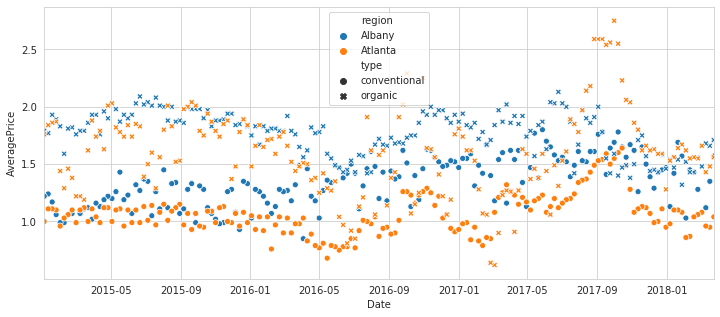

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.figure(figsize=[12,5])

ax = sns.scatterplot(
    data=avocados,
    x="Date",
    y="AveragePrice",
    hue="region",
    style = "type"
)

# Set the `xlim`
ax.set(xlim=(avocados.Date.min(), avocados.Date.max()))

# Show the plot
plt.show()

In [8]:
avocados["color"] = avocados["region"] +","+ avocados["type"]
px.line(
    avocados.sort_values(["color","Date"]),
    x="Date",
    y="AveragePrice", 
    color="color",
    template="none"
)

In [9]:
px.line(
    avocados.sort_values(["Date"]),
    x="Date",
    y="AveragePrice", 
    color="region",
    line_dash="type"
)